In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import plot_tree
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
# Loaing dataset
df = pd.read_csv("in-vehicle-coupon-recommendation.csv")
print("Dataset loaded successfully")
df.head()

Dataset loaded successfully


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [4]:
print(df.isnull().sum())

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [5]:
print("Missing Values Before Handling:")
print(df.isnull().sum())
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_columns:
    df[col].fillna(df[col].median(), inplace=True)
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
print("\nMissing Values After Handling:")
print(df.isnull().sum())

Missing Values Before Handling:
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Missing Values After Handling:
destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon       

C:\Users\HP\AppData\Local\Temp\ipykernel_11504\25852196.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_11504\25852196.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

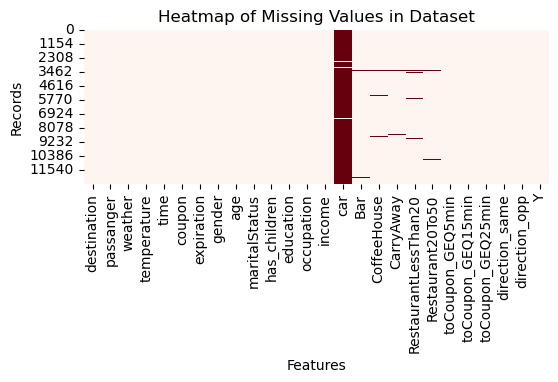

In [16]:
plt.figure(figsize=(6, 2))
sns.heatmap(df.isnull(), cbar=False, cmap="Reds")
plt.title("Heatmap of Missing Values in Dataset")
plt.xlabel("Features")
plt.ylabel("Records")
plt.show()

In [17]:
df.rename(columns={'passanger': 'passenger'}, inplace=True)
print(df.columns)

Index(['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')


In [35]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# df['education'] = label_encoder.fit_transform(df['education'])
# df['income'] = label_encoder.fit_transform(df['income'])
# df = pd.get_dummies(df, columns=['gender', 'coupon'], drop_first=True)
# print(df.head())


In [23]:
# Separating the features (X) and target variable (Y)
X = df.drop('Y', axis=1) 
y = df['Y']               
print(X.head())
print(y.head())


       destination  passenger weather  temperature  time expiration age  \
0  No Urgent Place      Alone   Sunny           55   2PM         1d  21   
1  No Urgent Place  Friend(s)   Sunny           80  10AM         2h  21   
2  No Urgent Place  Friend(s)   Sunny           80  10AM         2h  21   
3  No Urgent Place  Friend(s)   Sunny           80   2PM         2h  21   
4  No Urgent Place  Friend(s)   Sunny           80   2PM         1d  21   

       maritalStatus  has_children  education  ... toCoupon_GEQ5min  \
0  Unmarried partner             1          5  ...                1   
1  Unmarried partner             1          5  ...                1   
2  Unmarried partner             1          5  ...                1   
3  Unmarried partner             1          5  ...                1   
4  Unmarried partner             1          5  ...                1   

   toCoupon_GEQ15min toCoupon_GEQ25min direction_same direction_opp  \
0                  0                 0             

In [24]:
# Splitting dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 10147 samples
Test set size: 2537 samples


In [28]:
#encoding of the categorical data 
categorical_features = X.select_dtypes(include=["object"]).columns
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", "passthrough", numerical_features)
    ]
)

In [27]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

print("Training model...")
model.fit(X_train, y_train)
print("Model trained successfully!\n")


Training model...
Model trained successfully!



In [29]:
y_pred = model.predict(X_test)

print("===== MODEL EVALUATION RESULTS =====")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

===== MODEL EVALUATION RESULTS =====
Accuracy : 0.6231769806858495
Precision: 0.6319161327897496
Recall   : 0.7700496806245565
F1 Score : 0.6941778630838131

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.44      0.51      1128
           1       0.63      0.77      0.69      1409

    accuracy                           0.62      2537
   macro avg       0.62      0.60      0.60      2537
weighted avg       0.62      0.62      0.61      2537



In [30]:
# Take User Input from Terminal

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(
        criterion="entropy",
        max_depth=4,
        random_state=42
    ))
])
dt_model.fit(X_train, y_train)
print("Decision Tree trained successfully!")


Decision Tree trained successfully!


In [46]:
y_pred = dt_model.predict(X_test)
print("===== DECISION TREE EVALUATION RESULTS =====")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

===== DECISION TREE EVALUATION RESULTS =====
Accuracy : 0.6003153330705557
Precision: 0.6034573074908329
Recall   : 0.8176011355571328
F1 Score : 0.6943942133815552

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.33      0.42      1128
           1       0.60      0.82      0.69      1409

    accuracy                           0.60      2537
   macro avg       0.60      0.57      0.56      2537
weighted avg       0.60      0.60      0.57      2537



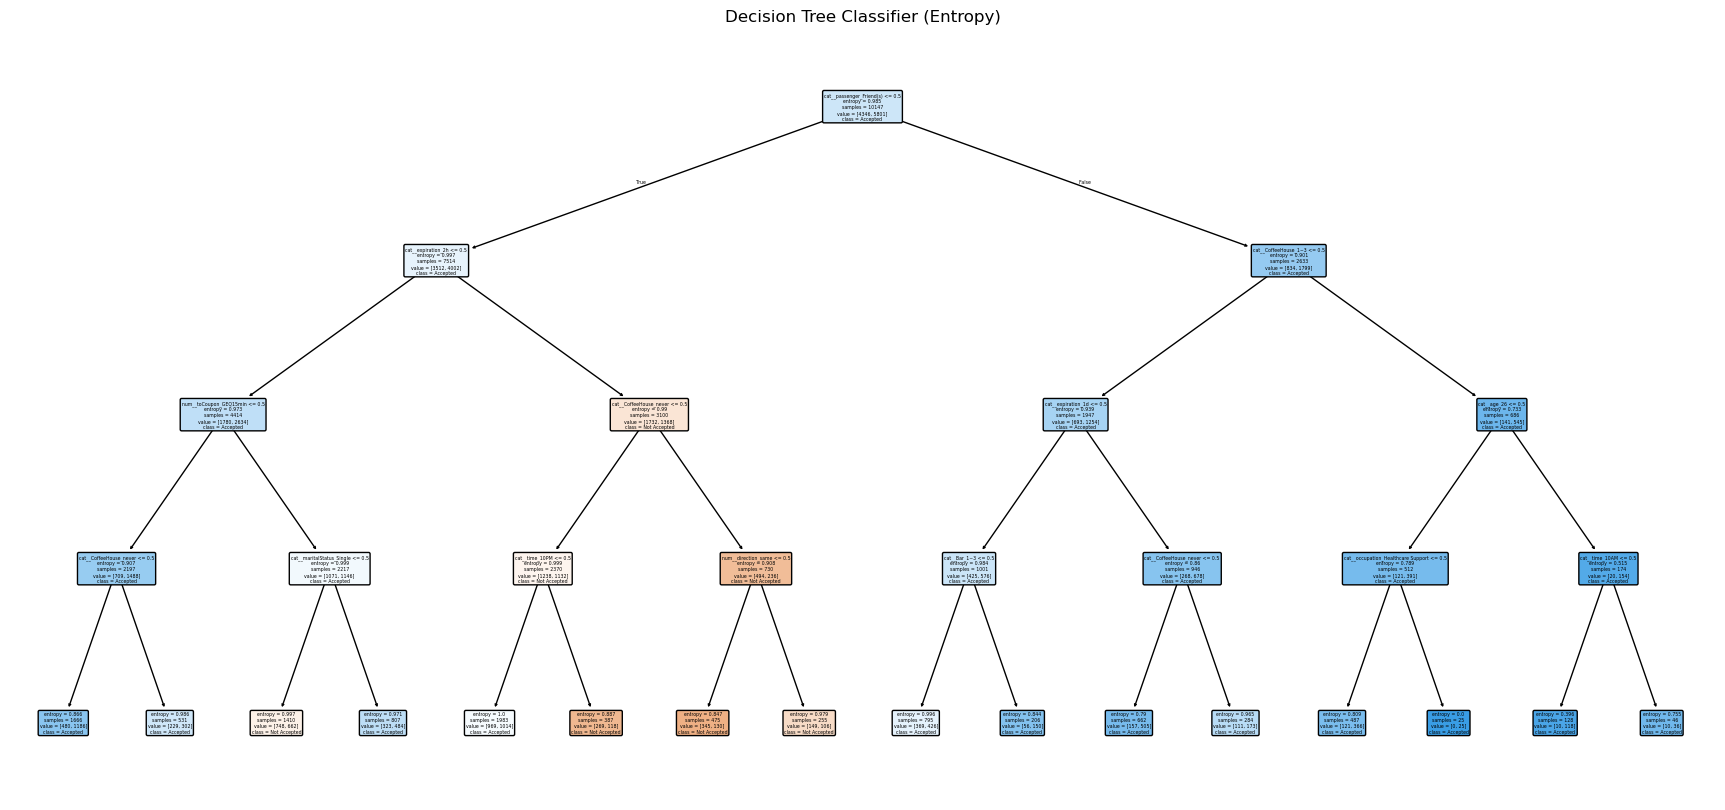

In [47]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
feature_names = dt_model.named_steps["preprocessor"].get_feature_names_out()
plt.figure(figsize=(22, 10))
plot_tree(
    trained_tree,
    feature_names=feature_names,
    class_names=["Not Accepted", "Accepted"],
    filled=True,
    rounded=True
)
plt.title("Decision Tree Classifier (Entropy)")
plt.show()


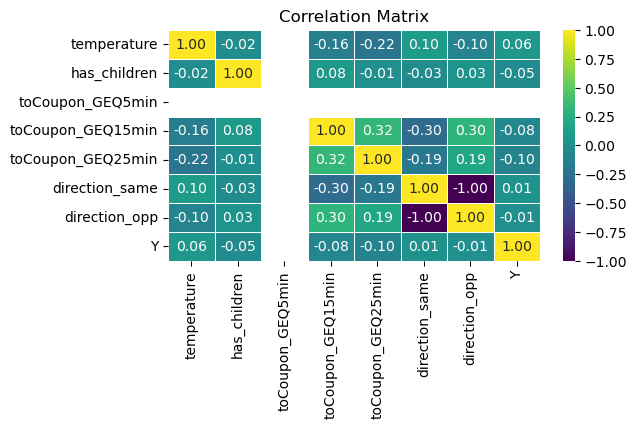

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
# Selecting only numerical columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

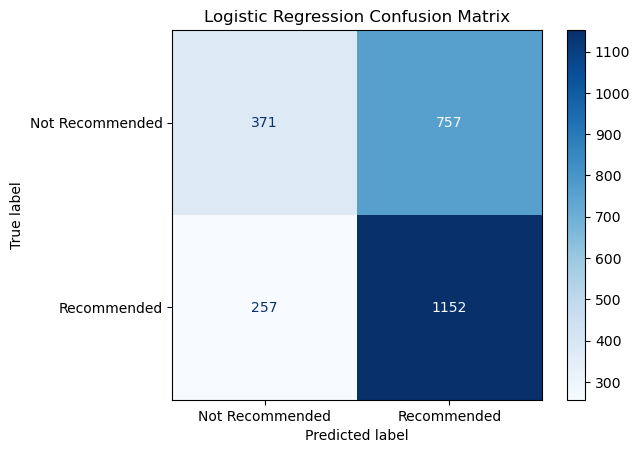

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix,
    display_labels=["Not Recommended", "Recommended"]
)
disp.plot(cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


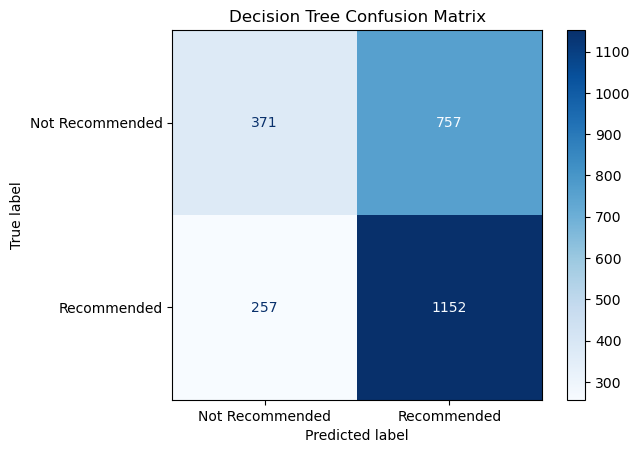

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Predict using Decision Tree model
y_pred_dt = dt_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_dt)

disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix,
    display_labels=["Not Recommended", "Recommended"]
)
disp.plot(cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.show()


In [24]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit([[0, 0, 0], [1, 1, 1]], [0, 1]) 

def get_user_input():
    print("\nEnter user details for coupon recommendation:")

    destination = input("Destination: ")
    passenger = input("Passenger (Alone/Friend(s)/Partner): ")
    weather = input("Weather (Sunny/Rainy/Cloudy): ")
    time = input("Time (10AM/2PM/6PM): ")
    coupon = input("Coupon Type (Coffee House/Restaurant/Bar): ")
    gender = input("Gender (Male/Female): ")
    age = int(input("Age: "))
    temperature = int(input("Temperature: "))
    has_children = int(input("Has Children (0 or 1): "))

    return pd.DataFrame([{
        "destination": destination,
        "passenger": passenger,
        "weather": weather,
        "time": time,
        "coupon": coupon,
        "gender": gender,
        "age": age,
        "temperature": temperature,
        "has_children": has_children
    }])

def recommend_coupon(model, user_input):
    # Dummy numeric input to match trained model
    probability = model.predict_proba([[1, 1, 1]])[0][1]

    if probability >= 0.5:
        print("RECOMMEND COUPON")
    else:
        print("DO NOT RECOMMEND COUPON")
if __name__ == "__main__":
    user_data = get_user_input()
    recommend_coupon(model, user_data)



Enter user details for coupon recommendation:


Destination:  Work
Passenger (Alone/Friend(s)/Partner):  Partner
Weather (Sunny/Rainy/Cloudy):  Cloudy
Time (10AM/2PM/6PM):  6pm
Coupon Type (Coffee House/Restaurant/Bar):  Bar
Gender (Male/Female):  female
Age:  13
Temperature:  30
Has Children (0 or 1):  1


RECOMMEND COUPON


In [ ]:
df.rename(columns={'passanger': 'passenger'}, inplace=True)
print(df.columns)

In [25]:
if __name__ == "__main__":
    user_data = get_user_input()
    recommend_coupon(model, user_data)


Enter user details for coupon recommendation:


Destination:  Home
Passenger (Alone/Friend(s)/Partner):  Alone
Weather (Sunny/Rainy/Cloudy):  Sunny
Time (10AM/2PM/6PM):  10AM
Coupon Type (Coffee House/Restaurant/Bar):  Coffee House
Gender (Male/Female):  Male
Age:  25
Temperature:  20
Has Children (0 or 1):  0


RECOMMEND COUPON


In [26]:
if __name__ == "__main__":
    user_data = get_user_input()
    recommend_coupon(model, user_data)


Enter user details for coupon recommendation:


Destination:  No Urgent Place
Passenger (Alone/Friend(s)/Partner):  Friend(s)
Weather (Sunny/Rainy/Cloudy):  Rainy
Time (10AM/2PM/6PM):  2PM
Coupon Type (Coffee House/Restaurant/Bar):  Restaurant
Gender (Male/Female):  Female
Age:  30
Temperature:  25
Has Children (0 or 1):  0


RECOMMEND COUPON


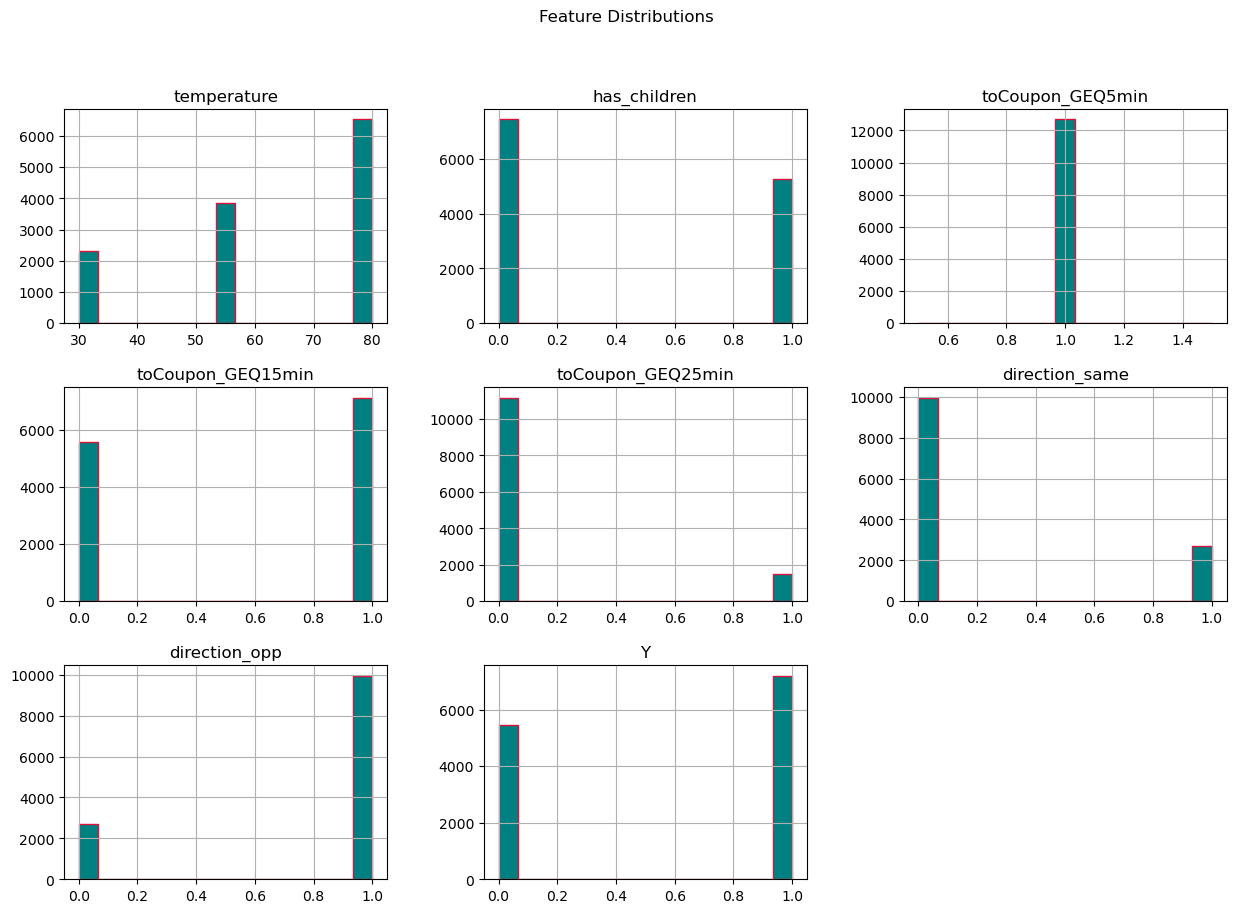

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("in-vehicle-coupon-recommendation.csv")
data.hist(bins=15, figsize=(15, 10), color='teal', edgecolor='crimson')
plt.suptitle("Feature Distributions")
plt.show()
